## Final Project Submission

Please fill out:
* Student name: Phillip Ojo
* Student pace: Part time 
* Scheduled project review date/time: August 18th 4:30pm
* Instructor name: James Irving
* Blog post URL: https://phillipojo24.github.io/linear_regression_model



## Introduction

### Problem Statement

We have been tasked with investigating the sale price of houses in the King County area and build a multivariable linear regression model to predict sale prices.

Throughout this exploration we will answer the following questions.

* Does the number of bedrooms have a high impact on sale price?

Understanding what number of bedrooms affect the price. 

* Does the diffrence in Zipcode affect sale price?

If you live in a certain zipcode how much is your sale price affected.

* Which features have a high impact on sales price?

If you are a homeowner and you want to increase your sale price, what features should you focus on.


## Data

A dataset has been provided and can be found in the kc_house_data.csv file in this repository.


The column names and descriptions as provided can be found in the column_names.md file in this repository. For convenience they have been reproduced below.

###Column Names and descriptions for Kings County Data Set

* id - unique identified for a house
* dateDate - house was sold
* pricePrice - is prediction target
* bedroomsNumber - of Bedrooms/House
* bathroomsNumber - of bathrooms/bedrooms
* sqft_livingsquare - footage of the home
* sqft_lotsquare - footage of the lot
* floorsTotal - floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Obtain Data

In [1]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')
df.drop(columns = 'id', inplace = True)
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      10/13/2014  221900.0         3       1.00         1180      5650   
1       12/9/2014  538000.0         3       2.25         2570      7242   
2       2/25/2015  180000.0         2       1.00          770     10000   
3       12/9/2014  604000.0         4       3.00         1960      5000   
4       2/18/2015  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   5/21/2014  360000.0         3       2.50         1530      1131   
21593   2/23/2015  400000.0         4       2.50         2310      5813   
21594   6/23/2014  402101.0         2       0.75         1020      1350   
21595   1/16/2015  400000.0         3       2.50         1600      2388   
21596  10/15/2014  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
0         1.0         NaN   0.0          3      7        1180           0.0   
1         2.0         0.0   0.0          3      7        2170         400.0   
2         1.0         0.0   0.0          3      6         770           0.0   
3         1.0         0.0   0.0          5      7        1050         910.0   
4         1.0         0.0   0.0          3      8        1680           0.0   
...       ...         ...   ...        ...    ...         ...           ...   
21592     3.0         0.0   0.0          3      8        1530           0.0   
21593     2.0         0.0   0.0          3      8        2310           0.0   
21594     2.0         0.0   0.0          3      7        1020           0.0   
21595     2.0         NaN   0.0          3      8        1600           0.0   
21596     2.0         0.0   0.0          3      7        1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           NaN    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 20 columns]

In [2]:
#GETTING DATA INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [3]:
#GETTING DATA BASIC STATS
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19221.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      0.233863      3.409825      7.657915   
std        0.539683      0.086825      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

In [4]:
#LOOKING AT NULL VALUES
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# SCRUB (DATA CLEANING)

In [5]:
#WANT TO FILL ALL NULL VALUES IN WATERFRONT WITH DISTRIBUTION OF 146:19075
s = df.waterfront.value_counts(normalize = True)
print(s)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64


In [6]:
waterfront_null = df.waterfront.isnull()
df.loc[waterfront_null,'waterfront'] = np.random.choice(s.index,size=len(df[waterfront_null]),p=s.values)
print(df.waterfront.value_counts())

0.0    21437
1.0      160
Name: waterfront, dtype: int64


In [7]:
#CONVERTING DATE FROM OBJECT TO DATE
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [8]:
#REPLACE ? WITH 0 IN SQFT_BASEMENT
df.sqft_basement.replace('?',0,inplace = True)

In [9]:
#REPLACING ALL NULL VALUES IN YR_RENOVATED TO 0 BECAUSE MAJORITY IS 0
for index, col in enumerate(df.yr_renovated.isnull()):
    if col == True:
        df.yr_renovated[index] = 0
df


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
0         1.0         0.0   0.0          3      7        1180           0.0   
1         2.0         0.0   0.0          3      7        2170         400.0   
2         1.0         0.0   0.0          3      6         770           0.0   
3         1.0         0.0   0.0          5      7        1050         910.0   
4         1.0         0.0   0.0          3      8        1680           0.0   
...       ...         ...   ...        ...    ...         ...           ...   
21592     3.0         0.0   0.0          3      8        1530           0.0   
21593     2.0         0.0   0.0          3      8        2310           0.0   
21594     2.0         0.0   0.0          3      7        1020           0.0   
21595     2.0         0.0   0.0          3      8        1600           0.0   
21596     2.0         0.0   0.0          3      7        1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 20 columns]

In [10]:
#TURNING VALUES FROM FLOAT TO INT
float_list = ['sqft_basement','waterfront','yr_renovated']
for col in float_list:
    df[col] = pd.to_numeric(df[col]).astype(int).round(0)

In [11]:
#ZIPCODE TO SUB_REGION DF
subregion_df = pd.read_excel('SubRegZipCityNeighborhood.xlsx')
subregion_df.columns= ['zipcode', 'Sub_Region']
subregion_df

zipcode   Sub_Region
0      98001  South Urban
1      98002  South Urban
2      98003  South Urban
3      98004   East Urban
4      98005   East Urban
..       ...          ...
115    98199      Seattle
116    98224   East Rural
117    98251   East Rural
118    98288   East Rural
119    98354  South Urban

[120 rows x 2 columns]

In [12]:
df = df.join(subregion_df.set_index('zipcode'),on = 'zipcode')
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0   0.0          3  ...        1180              0   
1         2.0           0   0.0          3  ...        2170            400   
2         1.0           0   0.0          3  ...         770              0   
3         1.0           0   0.0          5  ...        1050            910   
4         1.0           0   0.0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0   0.0          3  ...        1530              0   
21593     2.0           0   0.0          3  ...        2310              0   
21594     2.0           0   0.0          3  ...        1020              0   
21595     2.0           0   0.0          3  ...        1600              0   
21596     2.0           0   0.0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15         Sub_Region  
0            5650        South Urban  
1            7639            Seattle  
2            8062              North  
3            5000            Seattle  
4            7503         East Urban  
...           ...                ...  
21592        1509            Seattle  
21593        7200  South and Seattle  
21594        2007            Seattle  
21595        1287         East Urban  
21596        1357            Seattle  

[21597 rows x 21 columns]

In [13]:
df['Sub_Region'].value_counts()

Seattle              6233
East Urban           5694
South Urban          5278
North                1197
East Rural            922
South Rural           922
North & Seattle       748
South and Seattle     288
Vashon Island         117
Name: Sub_Region, dtype: int64

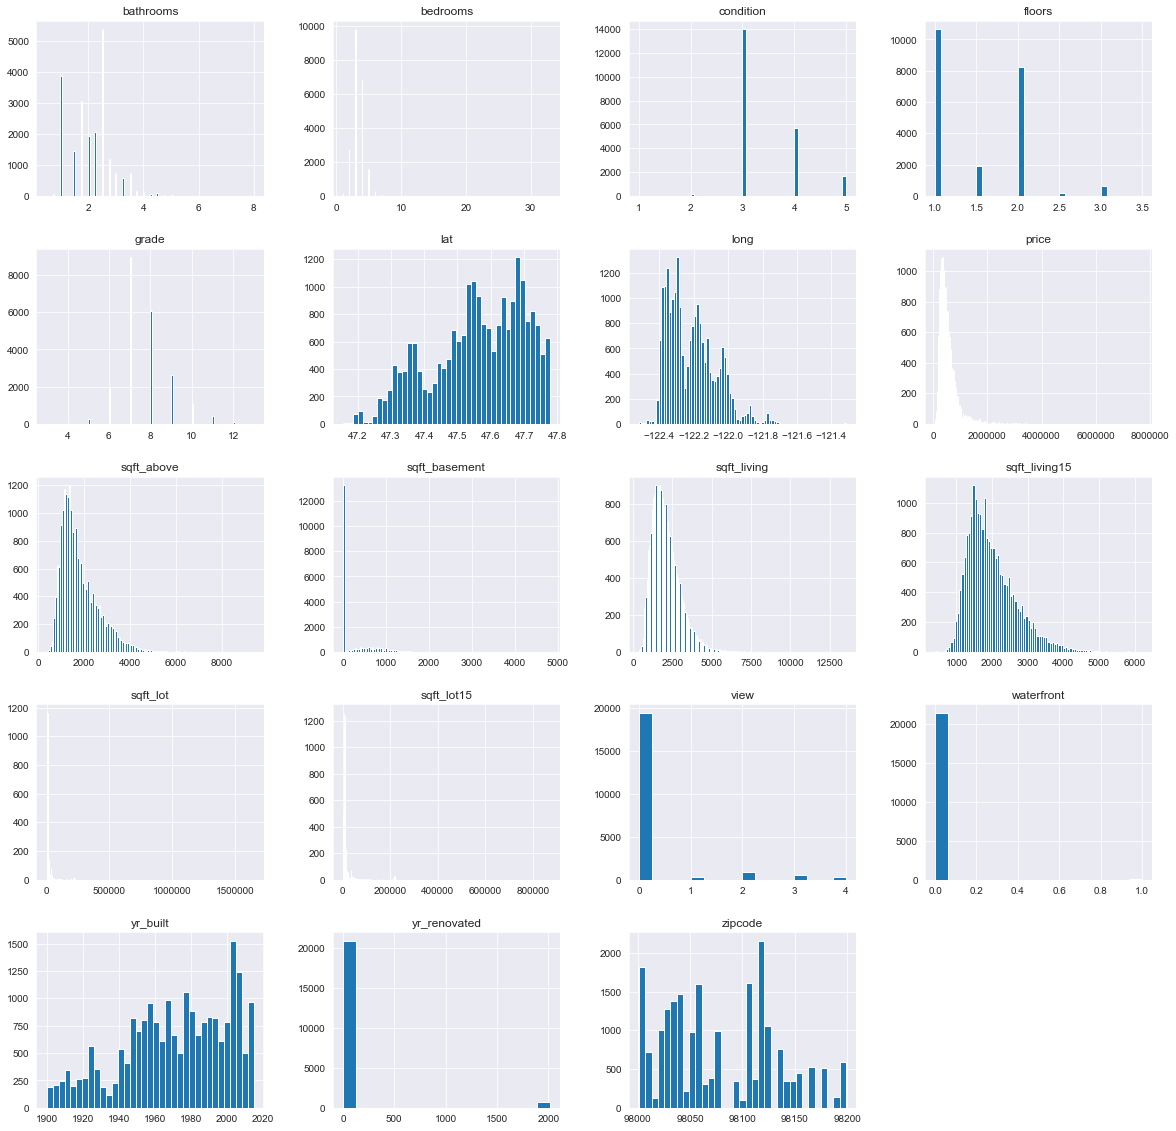

In [14]:
#Plot histograms of our x variables
df.hist(figsize=(20,20), bins = 'auto');

In [15]:
#TURNING COLUMNS TO STRING FOR HOT ENCODING
categories = ['Sub_Region','waterfront']
for cat in categories:
    df[cat] = df[cat].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [16]:
#HOT ENCODING
dummies = pd.get_dummies(df[categories],prefix = categories,drop_first = True)
df_preprocessed = df.drop(categories,axis = 1)
df_preprocessed = pd.concat([df_preprocessed,dummies],axis = 1)
df_preprocessed

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  view  condition  grade  ...  Sub_Region_East Urban  \
0         1.0   0.0          3      7  ...                      0   
1         2.0   0.0          3      7  ...                      0   
2         1.0   0.0          3      6  ...                      0   
3         1.0   0.0          5      7  ...                      0   
4         1.0   0.0          3      8  ...                      1   
...       ...   ...        ...    ...  ...                    ...   
21592     3.0   0.0          3      8  ...                      0   
21593     2.0   0.0          3      8  ...                      0   
21594     2.0   0.0          3      7  ...                      0   
21595     2.0   0.0          3      8  ...                      1   
21596     2.0   0.0          3      7  ...                      0   

       Sub_Region_North  Sub_Region_North & Seattle  Sub_Region_Seattle  \
0                     0                           0                   0   
1                     0                           0                   1   
2                     1                           0                   0   
3                     0                           0                   1   
4                     0                           0                   0   
...                 ...                         ...                 ...   
21592                 0                           0                   1   
21593                 0                           0                   0   
21594                 0                           0                   1   
21595                 0                           0                   0   
21596                 0                           0                   1   

       Sub_Region_South Rural  Sub_Region_South Urban  \
0                           0                       1   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
21592                       0                       0   
21593                       0                       0   
21594                       0                       0   
21595                       0                       0   
21596                       0                       0   

       Sub_Region_South and Seattle  Sub_Region_Vashon Island  Sub_Region_nan  \
0                                 0                         0               0   
1                                 0                         0               0   
2                                 0                         0               0   
3                                 0                         0               0   
4                                 0                         0               0   
...                             ...                       ...             ...   
21592                             0                         0               0   
21593                             1                         

In [17]:
#REMOVING EXTREME OUTLIERS
outliers_list = ['bedrooms','sqft_basement','sqft_above','sqft_living','sqft_lot','sqft_lot15','price']
for i in outliers_list:
    orig_tot = len(df_preprocessed)
    df_preprocessed = df_preprocessed[df_preprocessed[i] <= df_preprocessed[i].quantile(q=0.90)] # Subsetting to remove extreme outliers
    print('Percent removed:', (orig_tot -len(df_preprocessed))/orig_tot)

Percent removed: 0.08959577719127657
Percent removed: 0.09815888515919031
Percent removed: 0.09903000225580871
Percent removed: 0.1000250375563345
Percent removed: 0.10001391014049242
Percent removed: 0.0999227202472952
Percent removed: 0.100025757705847


In [18]:
outliers_list = ['bedrooms','sqft_basement','sqft_above','sqft_living','sqft_lot','sqft_lot15','price']
for i in outliers_list:
    orig_tot = len(df_preprocessed)
    df_preprocessed = df_preprocessed[df_preprocessed[i] >= df_preprocessed[i].quantile(q=0.10)] # Subsetting to remove extreme outliers
    print('Percent removed:', (orig_tot -len(df_preprocessed))/orig_tot)

Percent removed: 0.014405647777141766
Percent removed: 0.0
Percent removed: 0.09999032039492789
Percent removed: 0.09711765971176597
Percent removed: 0.09994044073853484
Percent removed: 0.09992059290629964
Percent removed: 0.09719158947213645


# Explore

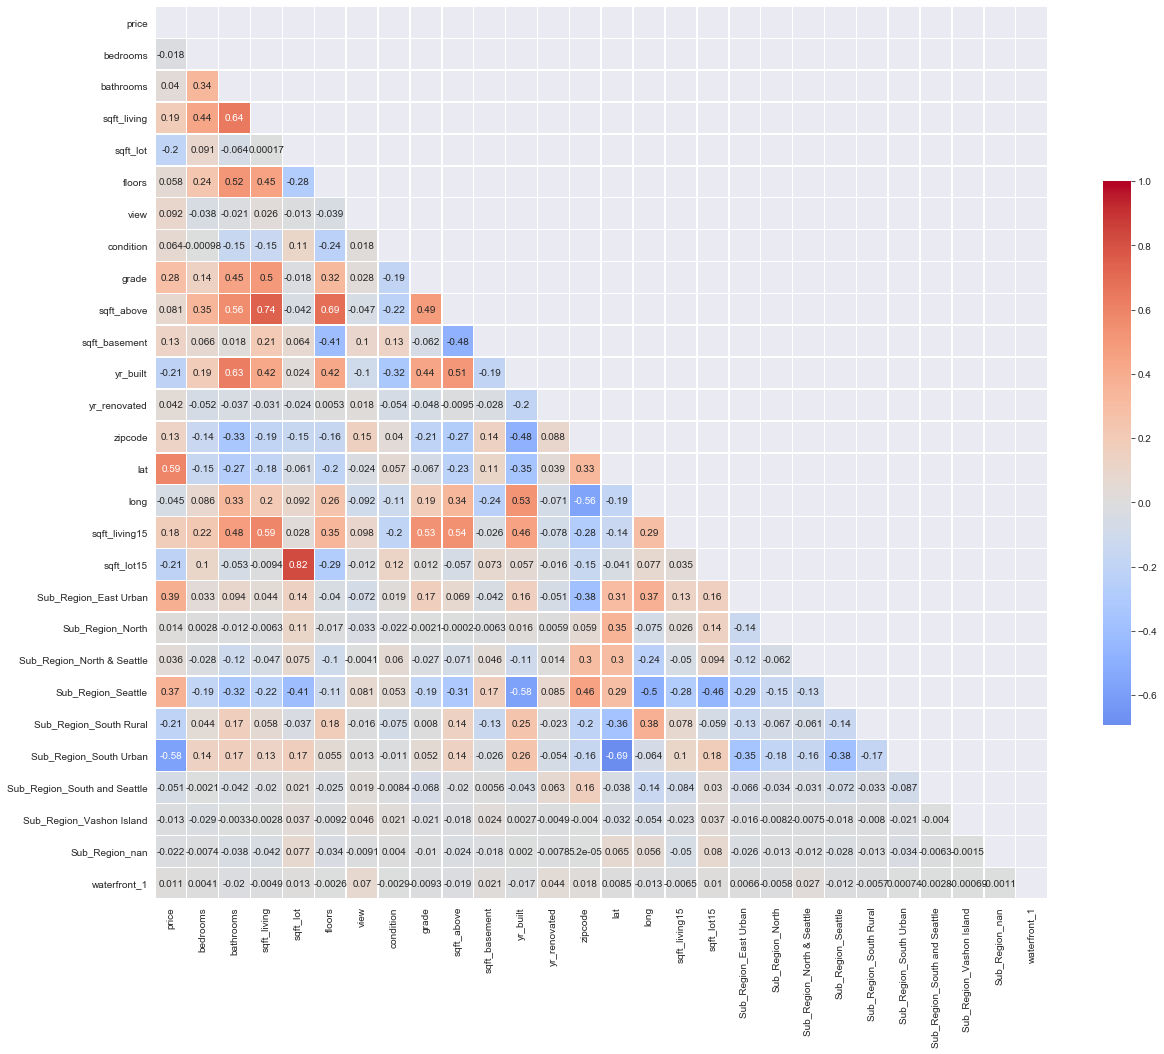

In [19]:
#CORRELATION HEATMAP
corr = df_preprocessed.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

# Starting Model

In [20]:
#2) set view nulls to 0, assumption: nulls mean nobody has viewed
df_preprocessed['view'] = df_preprocessed['view'].fillna(0)

In [21]:
#DROPPING COLUMNS WITH HIGH CORRELATION
df_preprocessed.drop('sqft_above',axis = 1,inplace=True)
df_preprocessed.drop('yr_built',axis = 1,inplace=True)
df_preprocessed.drop('sqft_lot15',axis = 1,inplace=True)
df_preprocessed.drop('Sub_Region_nan',axis = 1,inplace=True)
df_preprocessed.drop('Sub_Region_Vashon Island',axis = 1,inplace=True)

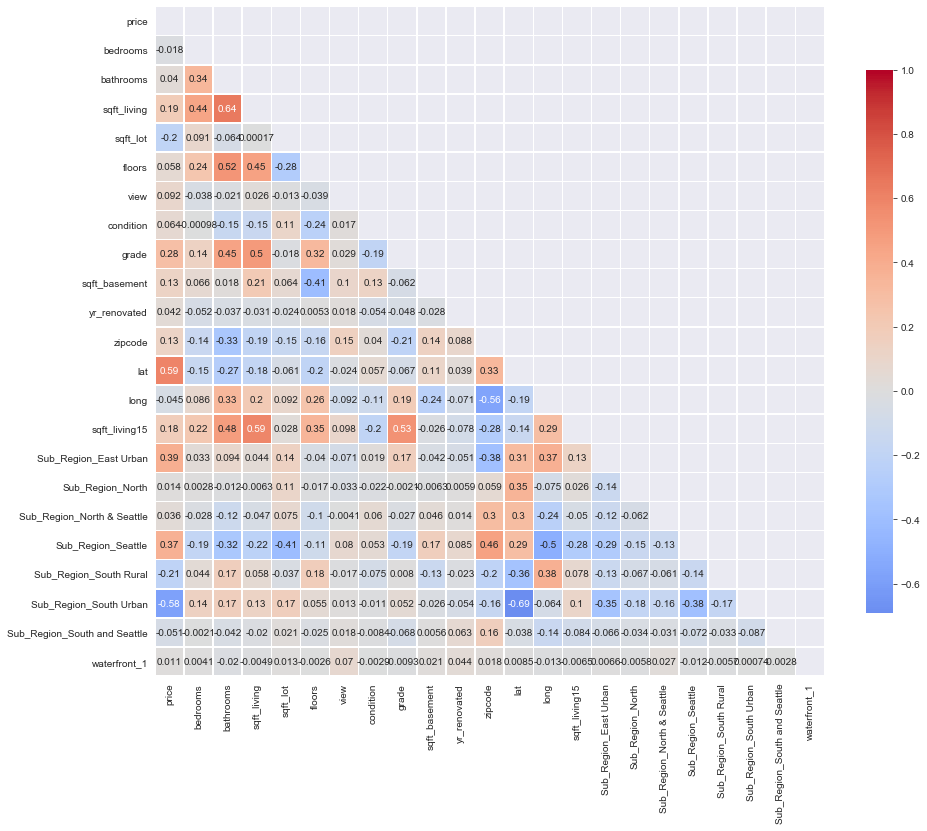

In [22]:
#CORRELATION HEATMAP
corr = df_preprocessed.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [23]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [24]:
YVar = df_preprocessed['price']
XVar = df_preprocessed.drop(['date', 'price'], axis = 1)


In [25]:
XVar2 = sm.add_constant(XVar)

In [26]:
linearModel = sm.OLS(YVar, XVar2).fit()
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     607.0
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:18:23   Log-Likelihood:                -76560.
No. Observations:                6140   AIC:                         1.532e+05
Df Residuals:                    6117   BIC:                         1.533e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.504e+07   2.38e+06     -6.317      0.000   -1.97e+07   -1.04e+07
bedrooms                     -3037.2131   1552.503     -1.956      0.050   -6080.665       6.239
bathrooms                      660.9129   2137.803      0.309      0.757   -3529.932    4851.758
sqft_living                     59.0620      3.868     15.268      0.000      51.478      66.645
sqft_lot                        -2.2568      0.438     -5.151      0.000      -3.116      -1.398
floors                        5873.5979   2712.682      2.165      0.030     555.786    1.12e+04
view                          1.785e+04   2092.720      8.530      0.000    1.37e+04     2.2e+04
condition                     2.042e+04   1335.567     15.289      0.000    1.78e+04     2.3e+04
grade                         3.448e+04   1630.168     21.151      0.000    3.13e+04    3.77e+04
sqft_basement                    2.3827      3.990      0.597      0.550      -5.440      10.205
yr_renovated                    10.7737      2.657      4.054      0.000       5.564      15.983
zipcode                         63.0719     21.628      2.916      0.004      20.673     105.471
lat                           2.727e+05   1.21e+04     22.461      0.000    2.49e+05    2.96e+05
long                          3.451e+04   1.26e+04      2.732      0.006    9745.642    5.93e+04
sqft_living15                   34.3078      2.920     11.749      0.000      28.583      40.032
Sub_Region_East Urban         8.002e+04   5478.653     14.605      0.000    6.93e+04    9.08e+04
Sub_Region_North             -1.503e+04   7133.985     -2.107      0.035    -2.9e+04   -1045.453
Sub_Region_North & Seattle    3442.1720   7990.335      0.431      0.667   -1.22e+04    1.91e+04
Sub_Region_Seattle            1.006e+05   7117.024     14.134      0.000    8.66e+04    1.15e+05
Sub_Region_South Rural       -1.197e+04   6286.658     -1.904      0.057   -2.43e+04     355.576
Sub_Region_South Urban       -2.792e+04   6422.973     -4.346      0.000   -4.05e+04   -1.53e+04
Sub_Region_South and Seattle  2.211e+04   9578.472      2.308      0.021    3329.914    4.09e+04
waterfront_1                  4.681e+04   3.66e+04      1.279      0.201    -2.5e+04    1.19e+05
==============================================================================
Omnibus:                       69.916   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.364
Skew:                          -0.003   Prob(JB):                     4.43e-27
Kurtosis:                       3.689   Cond. No.                     2.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corre

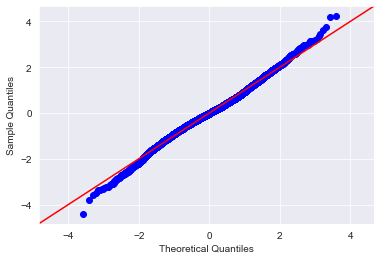

In [27]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(linearModel.resid, dist=stats.norm, line='45', fit=True)

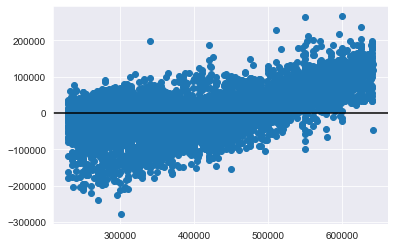

In [28]:
#CHECKING FOR HOMOSCEDACITY
plt.scatter(df_preprocessed['price'],linearModel.resid)
plt.axhline(0,color='black')

### Analysis

This is the base model that we would use to start to try and make improvements. The residuals are normally distributed.


# Question 1

## Does the number of bedrooms have a high affect on price?



In [29]:
# Investigate bedrooms
df_preprocessed['bedrooms'].value_counts()

3    3655
4    1924
2     561
Name: bedrooms, dtype: int64

In [30]:
#Create a copy of df to manipulate

bedroom_df = df_preprocessed.copy()


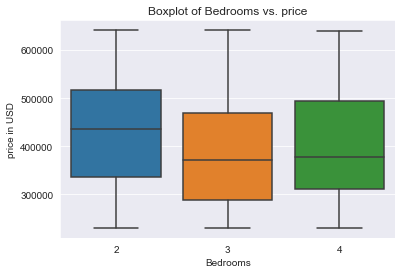

In [31]:
#Plot Boxplot

sns.boxplot(x = bedroom_df['bedrooms'], y = bedroom_df['price'])
plt.title(f"Boxplot of Bedrooms vs. price")
plt.ylabel("price in USD")
plt.xlabel(f"Bedrooms")
plt.show()

In [32]:
#One-HOT Encode Bedroom columns
bed_dummies = pd.get_dummies(bedroom_df['bedrooms'],prefix = 'bedroom_',drop_first = False)
bedroom_df2 = bedroom_df.drop('bedrooms',axis = 1)
bedroom_df2 = pd.concat([bedroom_df2,bed_dummies],axis = 1)
bedroom_df2



date        price  bathrooms  sqft_living  sqft_lot  floors  \
4     2015-02-18 510000.00000    2.00000         1680      8080 1.00000   
6     2014-06-27 257500.00000    2.25000         1715      6819 2.00000   
9     2015-03-12 323000.00000    2.50000         1890      6560 2.00000   
17    2014-05-29 485000.00000    1.00000         1600      4300 1.50000   
19    2015-04-24 230000.00000    1.00000         1250      9774 1.00000   
...          ...          ...        ...          ...       ...     ...   
21549 2015-02-26 341780.00000    2.75000         2260      4440 2.00000   
21561 2015-01-23 579000.00000    3.25000         1900      2631 2.00000   
21569 2014-08-28 270000.00000    2.50000         1870      5000 2.00000   
21587 2014-08-25 507250.00000    2.50000         2270      5536 2.00000   
21593 2015-02-23 400000.00000    2.50000         2310      5813 2.00000   

         view  condition  grade  sqft_basement  ...  Sub_Region_North  \
4     0.00000          3      8              0  ...                 0   
6     0.00000          3      7              0  ...                 0   
9     0.00000          3      7              0  ...                 0   
17    0.00000          4      7              0  ...                 0   
19    0.00000          4      7              0  ...                 0   
...       ...        ...    ...            ...  ...               ...   
21549 0.00000          3      7              0  ...                 0   
21561 0.00000          3      9            650  ...                 0   
21569 0.00000          3      7              0  ...                 0   
21587 0.00000          3      8              0  ...                 0   
21593 0.00000          3      8              0  ...                 0   

       Sub_Region_North & Seattle  Sub_Region_Seattle  Sub_Region_South Rural  \
4                               0                   0                       0   
6                               0                   0                       0   
9                               0                   0                       1   
17                              0                   1                       0   
19                              0                   0                       0   
...                           ...                 ...                     ...   
21549                           0                   0                       0   
21561                           0                   1                       0   
21569                           0                   0                       0   
21587                           0                   0                       0   
21593                           0                   0                       0   

       Sub_Region_South Urban  Sub_Region_South and Seattle  waterfront_1  \
4                           0                             0             0   
6                           1                             0             0   
9                           0                             0             0   
17                          0                             0             0   
19                          1                             0             0   
...                       ...                           ...           ...   
21549                       1                             0             0   
21561                       0                             0             0   
21569                       1                             0             0   
21587                       0                             0             0   
21593                       0                             1             0   

       bedroom__2  bedroom__3  bedroom__4  
4               0           1           0  
6               0           1           0  
9               0           1           0  
17              0           0           1  
19              0           1           0  
...           ...         ...         ...  
21549           0           

In [33]:
YVar1 = bedroom_df2['price']
XVar1 = bedroom_df2.drop(['date', 'price'], axis = 1)



In [34]:
XVar3 = sm.add_constant(XVar1)

In [35]:
linearModel2 = sm.OLS(YVar1, XVar3).fit()
linearModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     580.8
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:18:27   Log-Likelihood:                -76559.
No. Observations:                6140   AIC:                         1.532e+05
Df Residuals:                    6116   BIC:                         1.533e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.121e+07   1.79e+06     -6.275      0.000   -1.47e+07   -7.71e+06
bathrooms                      897.8049   2144.869      0.419      0.676   -3306.893    5102.503
sqft_living                     58.6245      3.882     15.103      0.000      51.015      66.234
sqft_lot                        -2.2184      0.439     -5.053      0.000      -3.079      -1.358
floors                        5880.1549   2712.505      2.168      0.030     562.690    1.12e+04
view                          1.784e+04   2092.609      8.523      0.000    1.37e+04    2.19e+04
condition                     2.045e+04   1335.723     15.313      0.000    1.78e+04    2.31e+04
grade                         3.452e+04   1630.377     21.175      0.000    3.13e+04    3.77e+04
sqft_basement                    2.4462      3.990      0.613      0.540      -5.376      10.269
yr_renovated                    10.6925      2.658      4.023      0.000       5.482      15.903
zipcode                         61.9619     21.643      2.863      0.004      19.535     104.389
lat                           2.722e+05   1.21e+04     22.417      0.000    2.48e+05    2.96e+05
long                          3.429e+04   1.26e+04      2.714      0.007    9519.331    5.91e+04
sqft_living15                   34.3184      2.920     11.753      0.000      28.594      40.043
Sub_Region_East Urban          7.97e+04   5483.331     14.535      0.000     6.9e+04    9.05e+04
Sub_Region_North             -1.517e+04   7134.255     -2.126      0.034   -2.92e+04   -1184.137
Sub_Region_North & Seattle    3174.4095   7992.269      0.397      0.691   -1.25e+04    1.88e+04
Sub_Region_Seattle                1e+05   7129.869     14.026      0.000     8.6e+04    1.14e+05
Sub_Region_South Rural       -1.223e+04   6289.140     -1.944      0.052   -2.46e+04     102.855
Sub_Region_South Urban       -2.827e+04   6427.850     -4.398      0.000   -4.09e+04   -1.57e+04
Sub_Region_South and Seattle  2.172e+04   9582.129      2.267      0.023    2935.881    4.05e+04
waterfront_1                  4.722e+04   3.66e+04      1.290      0.197   -2.45e+04    1.19e+05
bedroom__2                    -3.73e+06   5.95e+05     -6.266      0.000    -4.9e+06   -2.56e+06
bedroom__3                   -3.737e+06   5.95e+05     -6.278      0.000    -4.9e+06   -2.57e+06
bedroom__4                   -3.739e+06   5.95e+05     -6.280      0.000   -4.91e+06   -2.57e+06
==============================================================================
Omnibus:                       69.228   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.795
Skew:                          -0.002   Prob(JB):                     9.70e-27
Kurtosis:                       3.684   Cond. No.  

In [36]:
linearModel2.params.sort_values()

const                          -11206031.44539
bedroom__4                      -3738525.05621
bedroom__3                      -3737043.89578
bedroom__2                      -3730462.49339
Sub_Region_South Urban            -28267.61885
Sub_Region_North                  -15169.78794
Sub_Region_South Rural            -12226.07412
sqft_lot                              -2.21843
sqft_basement                          2.44619
yr_renovated                          10.69254
sqft_living15                         34.31840
sqft_living                           58.62451
zipcode                               61.96189
bathrooms                            897.80489
Sub_Region_North & Seattle          3174.40950
floors                              5880.15492
view                               17836.29559
condition                          20454.54769
Sub_Region_South and Seattle       21720.22616
long                               34286.02161
grade                              34523.63973
waterfront_1 

# Analysis 1

One-hot encoding the bedroom column did not improve the model and we can clearly see by the results that the number of bedrooms does have a highly negative affect on price. 

# Question 2 

Does the diffrence in Zipcode affect sale price?

In [37]:
# Make a copy to experiment with zipcodes

zipcode_df = df_preprocessed.copy()

In [38]:
YVar2 = df_preprocessed['price']
XVar2 = df_preprocessed.drop(['date', 'price','Sub_Region_South Rural','zipcode'], axis = 1)
XVar4 = sm.add_constant(XVar2)

In [39]:
linearModel3 = sm.OLS(YVar2, XVar4).fit()
linearModel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     666.1
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:18:27   Log-Likelihood:                -76566.
No. Observations:                6140   AIC:                         1.532e+05
Df Residuals:                    6119   BIC:                         1.533e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -9.772e+06   1.63e+06     -6.009      0.000    -1.3e+07   -6.58e+06
bedrooms                     -3160.7992   1553.147     -2.035      0.042   -6205.514    -116.084
bathrooms                      -89.4068   2128.367     -0.042      0.966   -4261.756    4082.942
sqft_living                     60.0656      3.859     15.567      0.000      52.501      67.630
sqft_lot                        -2.2447      0.438     -5.126      0.000      -3.103      -1.386
floors                        6213.7431   2713.063      2.290      0.022     895.184    1.15e+04
view                          1.887e+04   2070.631      9.111      0.000    1.48e+04    2.29e+04
condition                     2.026e+04   1335.405     15.168      0.000    1.76e+04    2.29e+04
grade                         3.431e+04   1630.566     21.040      0.000    3.11e+04    3.75e+04
sqft_basement                    2.4984      3.993      0.626      0.532      -5.330      10.327
yr_renovated                    11.0557      2.658      4.160      0.000       5.845      16.266
lat                           2.909e+05   1.05e+04     27.805      0.000     2.7e+05    3.11e+05
long                          3.411e+04   1.21e+04      2.822      0.005    1.04e+04    5.78e+04
sqft_living15                   33.6452      2.913     11.551      0.000      27.935      39.355
Sub_Region_East Urban         8.351e+04   4358.839     19.158      0.000     7.5e+04    9.21e+04
Sub_Region_North              -1.06e+04   6484.307     -1.634      0.102   -2.33e+04    2113.886
Sub_Region_North & Seattle    1.141e+04   7249.346      1.574      0.116   -2804.410    2.56e+04
Sub_Region_Seattle             1.09e+05   5917.787     18.414      0.000    9.74e+04    1.21e+05
Sub_Region_South Urban       -1.843e+04   4177.854     -4.412      0.000   -2.66e+04   -1.02e+04
Sub_Region_South and Seattle  3.422e+04   8291.006      4.128      0.000     1.8e+04    5.05e+04
waterfront_1                  4.703e+04   3.66e+04      1.284      0.199   -2.48e+04    1.19e+05
==============================================================================
Omnibus:                       68.400   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.894
Skew:                           0.005   Prob(JB):                     2.51e-26
Kurtosis:                       3.679   Cond. No.                     1.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
linearModel3.params.sort_values()

const                          -9771593.59437
Sub_Region_South Urban           -18432.55004
Sub_Region_North                 -10597.63663
bedrooms                          -3160.79921
bathrooms                           -89.40682
sqft_lot                             -2.24467
sqft_basement                         2.49840
yr_renovated                         11.05574
sqft_living15                        33.64519
sqft_living                          60.06556
floors                             6213.74308
Sub_Region_North & Seattle        11406.85795
view                              18865.62362
condition                         20255.07952
long                              34107.64454
Sub_Region_South and Seattle      34223.15310
grade                             34306.84316
waterfront_1                      47033.34786
Sub_Region_East Urban             83505.76799
Sub_Region_Seattle               108971.22237
lat                              290910.31148
dtype: float64

In [41]:
# #TURNING COLUMNS TO STRING FOR HOT ENCODING
categories_2 = ['zipcode']

#HOT ENCODING
dummies = pd.get_dummies(zipcode_df['zipcode'],prefix = 'zipcode_' , drop_first = True)
zipcode_df2 = zipcode_df.drop(categories_2,axis = 1)
zipcode_df2 = pd.concat([zipcode_df2,dummies],axis = 1)
zipcode_df2

date        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4     2015-02-18 510000.00000         3    2.00000         1680      8080   
6     2014-06-27 257500.00000         3    2.25000         1715      6819   
9     2015-03-12 323000.00000         3    2.50000         1890      6560   
17    2014-05-29 485000.00000         4    1.00000         1600      4300   
19    2015-04-24 230000.00000         3    1.00000         1250      9774   
...          ...          ...       ...        ...          ...       ...   
21549 2015-02-26 341780.00000         4    2.75000         2260      4440   
21561 2015-01-23 579000.00000         4    3.25000         1900      2631   
21569 2014-08-28 270000.00000         3    2.50000         1870      5000   
21587 2014-08-25 507250.00000         3    2.50000         2270      5536   
21593 2015-02-23 400000.00000         4    2.50000         2310      5813   

       floors    view  condition  grade  ...  zipcode__98146  zipcode__98148  \
4     1.00000 0.00000          3      8  ...               0               0   
6     2.00000 0.00000          3      7  ...               0               0   
9     2.00000 0.00000          3      7  ...               0               0   
17    1.50000 0.00000          4      7  ...               0               0   
19    1.00000 0.00000          4      7  ...               0               0   
...       ...     ...        ...    ...  ...             ...             ...   
21549 2.00000 0.00000          3      7  ...               0               0   
21561 2.00000 0.00000          3      9  ...               0               0   
21569 2.00000 0.00000          3      7  ...               0               0   
21587 2.00000 0.00000          3      8  ...               0               0   
21593 2.00000 0.00000          3      8  ...               1               0   

       zipcode__98155  zipcode__98166  zipcode__98168  zipcode__98177  \
4                   0               0               0               0   
6                   0               0               0               0   
9                   0               0               0               0   
17                  0               0               0               0   
19                  0               0               0               0   
...               ...             ...             ...             ...   
21549               0               0               0               0   
21561               0               0               0               0   
21569               0               0               0               0   
21587               0               0               0               0   
21593               0               0               0               0   

       zipcode__98178  zipcode__98188  zipcode__98198  zipcode__98199  
4                   0               0               0               0  
6                   0               0               0               0  
9                   0               0               0               0  
17                  0               0               0               0  
19                  0               0               0               0  
...               ...             ...             ...             ...  
21549               0               0               0               0  
21561               0               0               0               0  
21569               0               0               0               0  
21587               0               0               0               0  
21593               0               0               0               0  

[6140 rows x 91 columns]

In [46]:
YVar3 = zipcode_df2['price']
XVar3 = zipcode_df2.drop(['date', 'price','Sub_Region_South Rural', 'Sub_Region_East Urban', 'Sub_Region_North', 'Sub_Region_North & Seattle', 'Sub_Region_Seattle', 'Sub_Region_South Urban', 'Sub_Region_South and Seattle' ], axis = 1)
XVar5 = sm.add_constant(XVar3)

In [47]:
linearModel4 = sm.OLS(YVar3, XVar5).fit()
linearModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     266.7
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:21:08   Log-Likelihood:                -75423.
No. Observations:                6140   AIC:                         1.510e+05
Df Residuals:                    6057   BIC:                         1.516e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.305e+06   5.01e+06     -0.859      0.391   -1.41e+07    5.52e+06
bedrooms        -319.2019   1336.427     -0.239      0.811   -2939.075    2300.671
bathrooms       8985.4373   1815.512      4.949      0.000    5426.387    1.25e+04
sqft_living       65.0609      3.273     19.879      0.000      58.645      71.477
sqft_lot           0.4302      0.395      1.089      0.276      -0.344       1.204
floors          3678.9359   2327.282      1.581      0.114    -883.365    8241.237
view            1.794e+04   1796.863      9.984      0.000    1.44e+04    2.15e+04
condition        1.59e+04   1149.171     13.837      0.000    1.36e+04    1.82e+04
grade            2.91e+04   1423.308     20.447      0.000    2.63e+04    3.19e+04
sqft_basement     -2.9086      3.398     -0.856      0.392      -9.570       3.753
yr_renovated       4.7374      2.237      2.117      0.034       0.352       9.123
lat             2.105e+04   4.44e+04      0.474      0.635    -6.6e+04    1.08e+05
long            -2.56e+04   3.75e+04     -0.683      0.494    -9.9e+04    4.78e+04
sqft_living15     25.9234      2.546     10.181      0.000      20.932      30.915
waterfront_1    6.664e+04   3.06e+04      2.175      0.030    6581.957    1.27e+05
zipcode__98002 -2793.0594   9005.097     -0.310      0.756   -2.04e+04    1.49e+04
zipcode__98003  -625.3741   7290.286     -0.086      0.932   -1.49e+04    1.37e+04
zipcode__98004  3.294e+05   2.56e+04     12.855      0.000    2.79e+05     3.8e+05
zipcode__98005  2.969e+05   1.95e+04     15.209      0.000    2.59e+05    3.35e+05
zipcode__98006  2.046e+05   1.41e+04     14.472      0.000    1.77e+05    2.32e+05
zipcode__98007  2.115e+05   1.64e+04     12.906      0.000    1.79e+05    2.44e+05
zipcode__98008  2.187e+05   1.62e+04     13.488      0.000    1.87e+05    2.51e+05
zipcode__98010  3.378e+04   1.74e+04      1.939      0.053    -372.895    6.79e+04
zipcode__98011  1.386e+05    2.1e+04      6.593      0.000    9.74e+04     1.8e+05
zipcode__98014  1.041e+05   2.95e+04      3.528      0.000    4.62e+04    1.62e+05
zipcode__98019  7.845e+04   2.36e+04      3.323      0.001    3.22e+04    1.25e+05
zipcode__98022  1.004e+04   1.41e+04      0.713      0.476   -1.76e+04    3.76e+04
zipcode__98023 -2.075e+04   7337.572     -2.828      0.005   -3.51e+04   -6368.249
zipcode__98024  1.611e+05   2.97e+04      5.427      0.000    1.03e+05    2.19e+05
zipcode__98027  2.347e+05   1.59e+04     14.767      0.000    2.04e+05    2.66e+05
zipcode__98028  1.244e+05    2.1e+04      5.925      0.000    8.32e+04    1.66e+05
zipcode__98029   2.17e+05   1.66e+04     13.070      0.000    1.84e+05     2.5e+05
zipcode__98030  7577.8898   7845.487      0.966      0.334   -7802.056     2.3e+04
zipcode__98031  9335.9181   8316.973      1.123      0.262   -6968.307    2.56e+04
zipcode__980

# Analysis 2

Grouping the zipcode into sub regions gives us a better idea and which areas will increase sale price. Two stand out sub regoins are East Urban and Seattle. However, one-hot encoding the diffrent zipcode improved the model. 

# Question 3

Which features have a high impact on sales price?

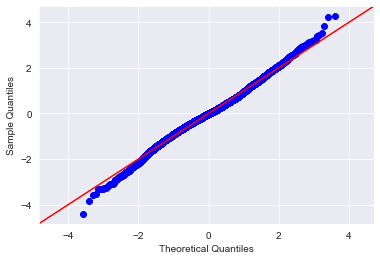

In [54]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(linearModel3.resid, dist=stats.norm, line='45', fit=True)

In [49]:
linearModel3.params.sort_values()

const                          -9771593.59437
Sub_Region_South Urban           -18432.55004
Sub_Region_North                 -10597.63663
bedrooms                          -3160.79921
bathrooms                           -89.40682
sqft_lot                             -2.24467
sqft_basement                         2.49840
yr_renovated                         11.05574
sqft_living15                        33.64519
sqft_living                          60.06556
floors                             6213.74308
Sub_Region_North & Seattle        11406.85795
view                              18865.62362
condition                         20255.07952
long                              34107.64454
Sub_Region_South and Seattle      34223.15310
grade                             34306.84316
waterfront_1                      47033.34786
Sub_Region_East Urban             83505.76799
Sub_Region_Seattle               108971.22237
lat                              290910.31148
dtype: float64

## Analysis 

We can see from the list above that the least important features that affect sale price are

* Water Front
* Bedrooms
* Bathrooms
* Square footage of lot

# Conclusions & Recommendations

## Question 1

* The number of bedrooms did not seem to affect the sale price. However for a given house depending on its square-footage, note that adding an additional bedroom does not necessarily result in a a sale price increase. 


## Question 2

* Grouping the zip codes into regions did not improve the model. However, by using the zip codes instead of the sub regions the model dramtically increased. Future analsis will invole seeing how the prices of house that are located to major sporting venues affect price.
